# LaTEX Figure Formatting (Optional)

In [28]:
from google.colab import output, files

In [29]:
! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8
output.clear()

In [30]:
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
output.clear()

# Main Code

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
N = 20
p = 1/4
q = 1/4
S = 1000 # number of times to run simulation

In [14]:
def get_pi_distribution(N:int, p:float, q:float,S:int) -> np.ndarray:
  assert N%2 == 0, 'N must be an even integer'
  assert p <= 1 and p >= 0, 'p must be between 0 and 1'
  assert q <= 1 and q >= 0, 'q must be between 0 and 1'
  r = np.diag(v=np.ones(N))
  pij = np.zeros((N,N))
  pij[0,0] = 1/2
  pij[0,1] = 1/2
  pij[-1,-1] = 1/2
  pij[-1,-2] = 1/2
  for l in range(1,N//2): # create left probabilities first
    pij[l,l-1] = q
    pij[l,l+1] = p
    pij[l,l] = 1/2
  for R in range(N//2,N-1):
    pij[R,R-1] = p
    pij[R,R+1] = q
    pij[R,R] = 1/2
  P = pij
  for s in range(S):
    P = np.matmul(P,pij)
  return np.matmul(r,P)

In [53]:
def make_plot(fig_num:int,data:np.ndarray,num_colors:int,title_text:str):
  cmap = plt.get_cmap('jet',num_colors)
  cmap.set_under('gray')
  plt.figure(fig_num, figsize=(10,8))
  im = plt.imshow(data,cmap=cmap,vmin=0, vmax=data.max())
  N = data.shape[0]
  ax = plt.gca();

  # Major ticks
  ax.set_xticks(np.arange(0, N, 1))
  ax.set_yticks(np.arange(0, N, 1))

  # Labels for major ticks
  ax.set_xticklabels(np.arange(0, N, 1))
  ax.set_yticklabels(np.arange(0, N, 1))

  # Minor ticks
  ax.set_xticks(np.arange(-.5, N, 1), minor=True)
  ax.set_yticks(np.arange(-.5, N, 1), minor=True)

  # Gridlines based on minor ticks
  ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

  ax.set_title(title_text)
  ax.set_xlabel('$j$')
  ax.set_ylabel('$i$')
  plt.colorbar(im)
  plt.show()

In [176]:
def jump_case1(current_state:int, N:int):
  a = np.random.uniform(0,1)
  if current_state == 0:
    if a <= 1/2:
      next = current_state + 1
    else:
      next = current_state
  elif current_state == N-1:
    if a <= 1/2:
      next = current_state - 1
    else:
      next = current_state
  else:
    if a <= 0.5:
      next = current_state
    elif a > 0.5 and a <= 0.75:
      next = current_state + 1
    elif a <= 1 and a >= 0.75:
      next = current_state - 1
  return next

In [250]:
def jump_case2(current_state:int, N:int):
  a = np.random.uniform(0,1)
  if current_state == 0:
    if a <= 1/2:
      next = current_state + 1
    else:
      next = current_state
  elif current_state == N-1:
    if a <= 1/2:
      next = current_state - 1
    else:
      next = current_state
  elif current_state in np.arange(1,N//2):
    if a <= 0.5:
      next = current_state
    elif a > 0.5 and a <= 0.7:
      next = current_state + 1
    elif a <= 1 and a >= 0.7:
      next = current_state - 1
  elif current_state in np.arange(N//2,N-1):
    if a <= 0.5:
      next = current_state
    elif a > 0.5 and a <= 0.7:
      next = current_state - 1
    elif a <= 1 and a >= 0.7:
      next = current_state + 1
  return next

In [281]:
def jump_case3(current_state:int, N:int):
  a = np.random.uniform(0,1)
  if current_state == 0:
    if a <= 1/2:
      next = current_state + 1
    else:
      next = current_state
  elif current_state == N-1:
    if a <= 1/2:
      next = current_state - 1
    else:
      next = current_state
  elif current_state in np.arange(1,N//2):
    if a <= 0.5:
      next = current_state
    elif a > 0.5 and a <= 0.51:
      next = current_state + 1
    elif a <= 1 and a > 0.51:
      next = current_state - 1
  elif current_state in np.arange(N//2,N-1):
    if a <= 0.5:
      next = current_state
    elif a > 0.5 and a <= 0.51:
      next = current_state - 1
    elif a <= 1 and a > 0.51:
      next = current_state + 1
  return next

In [5]:
r = np.diag(v=np.ones(N))

In [133]:
case1 = get_pi_distribution(N,1/4,1/4,S)
case2 = get_pi_distribution(N,0.2,0.3,S)
case3 = get_pi_distribution(N,0.01,0.49,S)

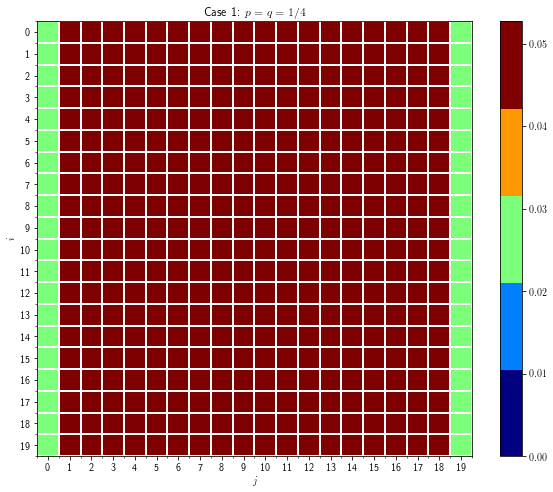

In [54]:
make_plot(1,case1,5,title_text='Case 1: $p = q = 1/4$')

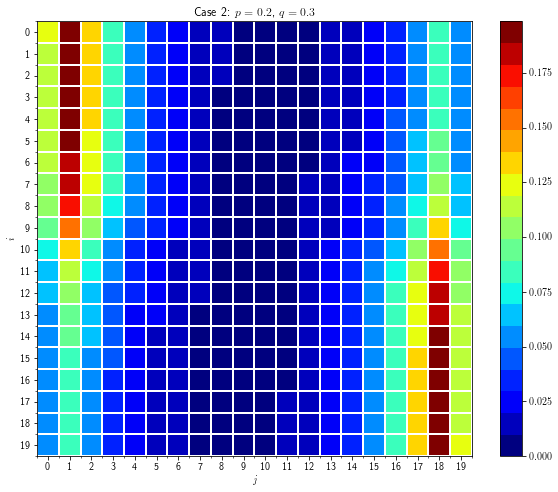

In [57]:
make_plot(2,case2,20,'Case 2: $p = 0.2$, $q=0.3$')

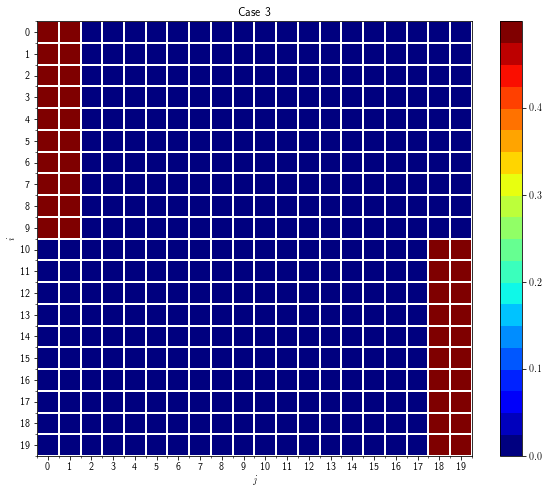

In [58]:
make_plot(3,case3,20,'Case 3')

In [62]:
# simulate chain 1 starting from X0 = 0 
num_k = 10
out = np.zeros()
for j in range(N):
  for k in K:
    start = 0
    end = start
    for i in range(k):
      end = jump_case1(end,N)
    out.append(end)

In [ ]:
out

In [338]:
Case1 = []
Case2 = []
Case3 = []
Case1_T = []
Case2_T = []
K = [1,2,3,4,5,6,7,8,9,10,25,50,100,150,200,250,500,1000]
# K = [1,2,3,4,5,6,7,8,9,10]
for k in K:
  out = []
  out2 = []
  out3 = []
  for s in range(S):
    end = 0
    end2 = 0
    end3 = 0
    for i in range(0,k):
      end = jump_case1(end,N)
      end2 = jump_case2(end2,N)
      end3 = jump_case3(end3,N)
    out.append(end)
    out2.append(end2)
    out3.append(end3)
  t1 = plt.hist(out,bins=np.arange(0,N+1),density=True)[0].tolist()
  t2 = plt.hist(out2,bins=np.arange(0,N+1),density=True)[0].tolist()
  t3 = plt.hist(out3,bins=np.arange(0,N+1),density=True)[0].tolist()
  Case1.append(t1)
  Case2.append(t2)
  Case3.append(t3)
  Case1_T.append(get_pi_distribution(N,1/4,1/4,k)[0,:].tolist())
  Case2_T.append(get_pi_distribution(N,0.2,0.3,k)[0,:].tolist())
  plt.close('all')

In [339]:
A = np.sum(np.abs(np.array(Case1) - case1[0,:])**2,axis=1)
B = np.sum(np.abs(np.array(Case2) - case2[0,:])**2,axis=1)
C = np.sum(np.abs(np.array(Case3) - case3[0,:])**2,axis=1)

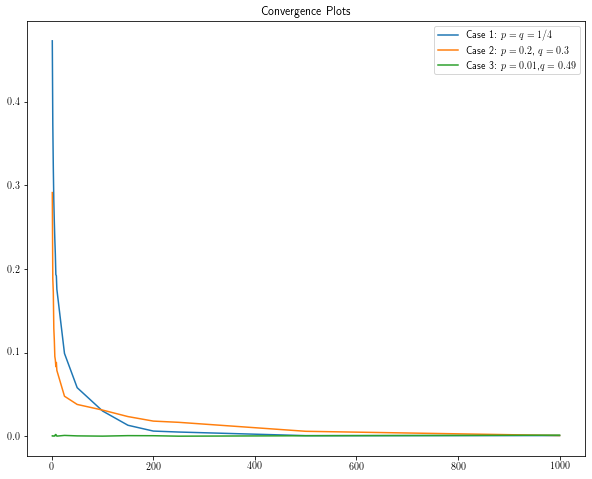

In [340]:
plt.figure(4,figsize=(10,8))
plt.plot(K,A)
plt.plot(K,B)
plt.plot(K,C)
plt.legend(['Case 1: $p=q=1/4$','Case 2: $p=0.2$, $q=0.3$','Case 3: $p=0.01$,$q=0.49$'])
plt.title('Convergence Plots')
plt.show()
# plt.ylim([0,50])

In [278]:
A[0], B[0]

(199.25789540229124, 196.7227839322441)

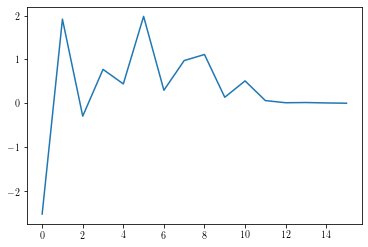

In [279]:
plt.plot(B-A)

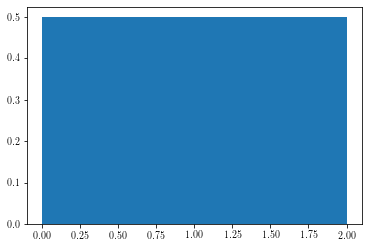

In [122]:
a = plt.hist(np.linspace(0,2,100),density=True,bins=20)

In [127]:
a[0].shape

(20,)

In [ ]:
Case2

In [205]:
np.array(Case2)[10,:]

array([0.65714286, 0.        , 1.12571429, 0.        , 0.        ,
       0.60285714, 0.        , 0.        , 0.32      , 0.        ,
       0.        , 0.10571429, 0.        , 0.        , 0.02571429,
       0.        , 0.        , 0.01714286, 0.        , 0.00285714])

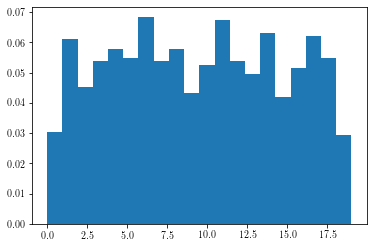

In [214]:
plt.hist(out,density=True,bins=20)
plt.show()

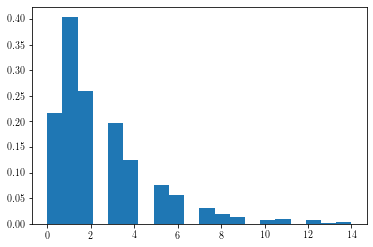

In [238]:
plt.hist(out2,density=True,bins=20)
plt.show()

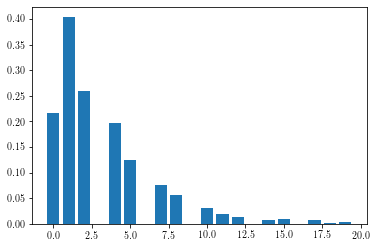

In [231]:
plt.bar(np.arange(0,N),np.array(Case2)[-1,:])
plt.show()

In [292]:
out = []
out2 = []
out3 = []
for s in range(S):
  end = 0
  end2 = 0
  end3 = 0
  for i in range(0,100):
    end = jump_case1(end,N)
    end2 = jump_case2(end2,N)
    end3 = jump_case3(end3,N)
  out.append(end)
  out2.append(end2)
  out3.append(end3)

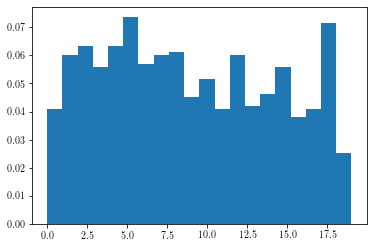

In [298]:
plt.hist(out,density=True,bins=20)
plt.show()

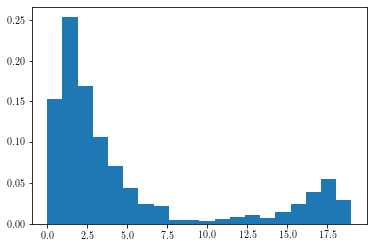

In [297]:
plt.hist(out2,density=True,bins=20)
plt.show()

In [272]:
a = plt.hist(out,density=True,bins=20)[0] 
diff1 = np.abs(a - case1[0,:])
plt.close()

In [262]:
np.sum(diff1)

0.7123879011743881

In [263]:
b = plt.hist(out,density=True,bins=20)[0] 
diff2 = np.abs(a - case2[0,:])
plt.close()

In [264]:
np.sum(diff2)

0.8275437882892628

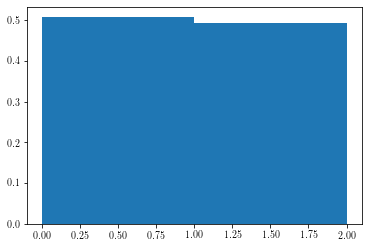

In [300]:
plt.hist(out3,density=True,bins=2)
plt.show()

In [322]:
t3 = plt.hist(out3,bins=np.arange(0,N+1),density=True)[0]
plt.close()

In [318]:
t3/np.sum(t3)

array([0.473, 0.519, 0.007, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])

In [323]:
t3

array([0.473, 0.519, 0.007, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   ])